In [34]:
import seaborn as sns
import os
from scipy.stats import kurtosis, skew
import pickle
from scipy.stats import gaussian_kde

from rcv_distribution import *
from MDS_analysis import *
from voting_rules import *
import random
from itertools import permutations
from collections import defaultdict
from collections import Counter

In [8]:
def load_data(filename, save_folder):
    # Extract the base filename without extension
    base_filename = os.path.splitext(os.path.basename(filename))[0]

    # Create the save paths for dictionary and list
    dict_load_path = os.path.join(save_folder, f"{base_filename}_ballots.pkl")
    list_load_path = os.path.join(save_folder, f"{base_filename}_candidates.pkl")

    # Load the dictionary
    with open(dict_load_path, 'rb') as dict_file:
        data_dict = pickle.load(dict_file)

    # Load the list
    with open(list_load_path, 'rb') as list_file:
        data_list = pickle.load(list_file)

    return data_dict, data_list



In [9]:
def normalize_positions(position_dict):
    # Get the list of positions from the dictionary
    positions = list(position_dict.values())
    
    # Find the minimum and maximum positions
    min_position = min(positions)
    max_position = max(positions)
    
    # Normalize positions and create a new dictionary
    normalized_dict = {}
    for name, position in position_dict.items():
        normalized_position = (position - min_position) / (max_position - min_position)
        normalized_dict[name] = normalized_position
    
    return normalized_dict

In [10]:
def merge_dicts_sum(dict1, dict2):
    # Create a new dictionary to store the merged results
    merged_dict = {}
    
    # Add all key-value pairs from the first dictionary
    for key, value in dict1.items():
        if key in merged_dict:
            merged_dict[key] += value
        else:
            merged_dict[key] = value
    
    # Add all key-value pairs from the second dictionary
    for key, value in dict2.items():
        if key in merged_dict:
            merged_dict[key] += value
        else:
            merged_dict[key] = value
    
    return merged_dict


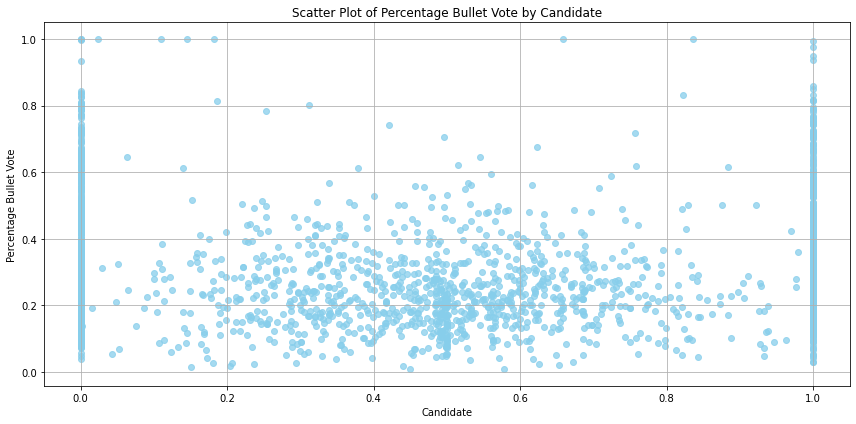

In [38]:
directory = "np_data_new"
df = pd.read_csv("median_voter_analysis.csv")
partisan_kdes = {'YES': [], 'NO': []}
all_bullet_votes = {}
all_votes = {}
candidate_percentage_pairs = []  # List to store (candidate, percentage_bullet_vote[candidate]) pairs

for file in os.listdir(directory):
    try:        
        filename = file[:-4]
        ballots, candidates = load_data(filename, "saved_ballots_and_candidates")
        directory = "null_elections/"
        csv = directory + filename + '.csv'
        df = pd.read_csv(csv)  
        candidates = df['candidate'].values
        election = pd.read_csv("election_table.csv")
        choices = len(candidates)
        positions = pd.Series(df['position'].values, index=df['candidate']).to_dict()
        normalized_distances = normalize_positions(positions)
        bullet_votes = {}
        total_votes = {}
        for b in ballots:
            if len(b) > 0:
                first_place_choice = normalized_distances[b[0]]
                if first_place_choice not in total_votes:
                    total_votes[first_place_choice] = 0
                total_votes[first_place_choice] += ballots[b]

            if len(b) == 1:
                first_place_choice = normalized_distances[b[0]]
                if first_place_choice not in bullet_votes:
                    bullet_votes[first_place_choice] = 0
                bullet_votes[first_place_choice] += ballots[b]

        percent_bullet_vote = {}
        for candidate in bullet_votes:
            percent_bullet_vote[candidate] = bullet_votes[candidate] / total_votes[candidate]
            candidate_percentage_pairs.append((candidate, percent_bullet_vote[candidate]))  # Append the pair

        all_bullet_votes = merge_dicts_sum(all_bullet_votes, percent_bullet_vote)
        #all_votes = merge_dicts_sum(all_votes, total_votes)

    except Exception as e:
        print(filename, " ", e)

# Convert the list to a NumPy array
candidate_percentage_pairs = np.array(candidate_percentage_pairs)

# Plot the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(candidate_percentage_pairs[:, 0], candidate_percentage_pairs[:, 1], alpha=0.75, color='skyblue')
plt.xlabel('Candidate')
plt.ylabel('Percentage Bullet Vote')
plt.title('Scatter Plot of Percentage Bullet Vote by Candidate')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Albany_11082022_FAKECityCouncil   list index out of range


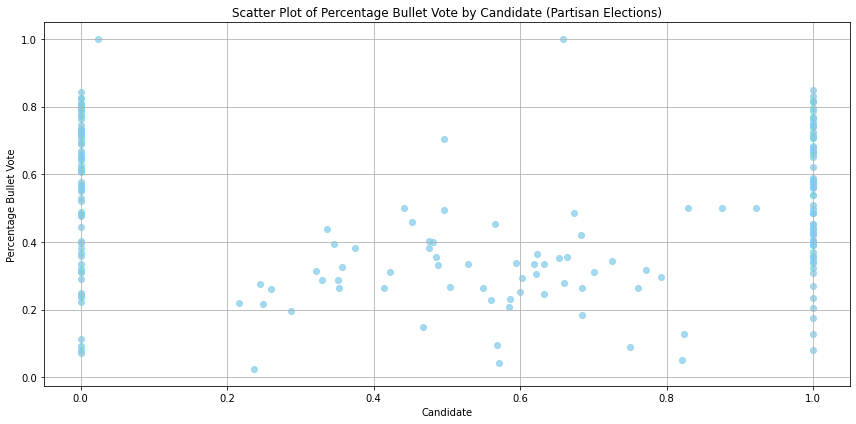

In [48]:
directory = "np_data_new"
df = pd.read_csv("median_voter_analysis.csv")

partisan_kdes = {'YES': [], 'NO': []}
election = pd.read_csv("election_table.csv")
candidate_percentage_pairs = []
all_bullet_votes = {}
all_votes = {}
for file in os.listdir(directory):
    filename = file[0:-4]
    #print(filename) 
    #print(df.loc[df["filename"]==(filename+'.csv'), "partisan"].tolist()[0])
    try:        
        
        if df.loc[df["filename"]==(filename+'.csv'), "partisan"].tolist()[0] == 'YES':
            ballots, candidates = load_data(filename, "saved_ballots_and_candidates")
            directory2 = "null_elections/"
            csv = directory2 + filename + '.csv'
            df2 = pd.read_csv(csv)  
            candidates = df2['candidate'].values
            
            choices = len(candidates)
            positions = pd.Series(df2['position'].values, index=df2['candidate']).to_dict()
            normalized_distances = normalize_positions(positions)
            bullet_votes = {}
            total_votes = {}
            for b in ballots:
                if len(b) > 0:
                    first_place_choice = normalized_distances[b[0]]
                    if first_place_choice not in total_votes:
                        total_votes[first_place_choice] = 0
                    total_votes[first_place_choice] += ballots[b]

                if len(b) == 1:
                    first_place_choice = normalized_distances[b[0]]
                    if first_place_choice not in bullet_votes:
                        bullet_votes[first_place_choice] = 0
                    bullet_votes[first_place_choice] += ballots[b]

            percent_bullet_vote = {}
            for candidate in bullet_votes:
                percent_bullet_vote[candidate] = bullet_votes[candidate] / total_votes[candidate]
                candidate_percentage_pairs.append((candidate, percent_bullet_vote[candidate]))  # Append the pair
            
            all_bullet_votes = merge_dicts_sum(all_bullet_votes, percent_bullet_vote)
            #all_votes = merge_dicts_sum(all_votes, total_votes)

    except Exception as e:
        print (filename, " " , e)


"""percent_bullet_vote = {}
for candidate in all_bullet_votes:
    percent_bullet_vote[candidate] = all_bullet_votes[candidate] / all_votes[candidate]"""

candidate_percentage_pairs = np.array(candidate_percentage_pairs)

# Plot the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(candidate_percentage_pairs[:, 0], candidate_percentage_pairs[:, 1], alpha=0.75, color='skyblue')
plt.xlabel('Candidate')
plt.ylabel('Percentage Bullet Vote')
plt.title('Scatter Plot of Percentage Bullet Vote by Candidate (Partisan Elections)')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

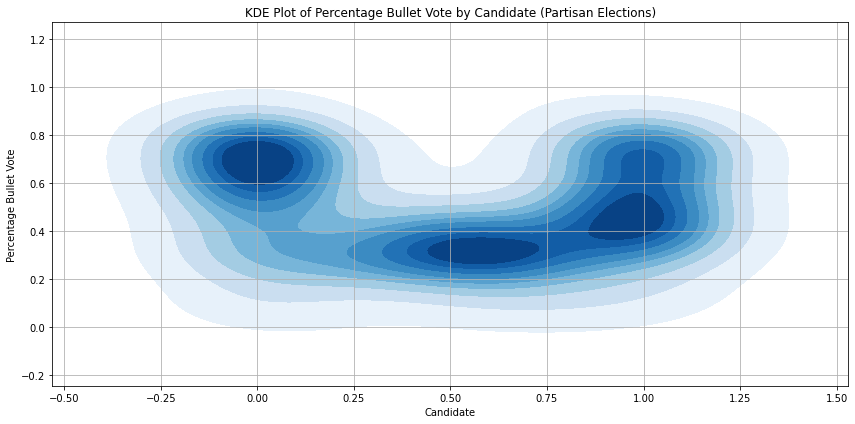

In [49]:
candidate_percentage_df = pd.DataFrame(candidate_percentage_pairs, columns=['Candidate', 'PercentageBulletVote'])

# Plot the KDE
plt.figure(figsize=(12, 6))
sns.kdeplot(data=candidate_percentage_df, x='Candidate', y='PercentageBulletVote', cmap='Blues', fill=True)
plt.xlabel('Candidate')
plt.ylabel('Percentage Bullet Vote')
plt.title('KDE Plot of Percentage Bullet Vote by Candidate (Partisan Elections)')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Albany_11082022_FAKECityCouncil   list index out of range


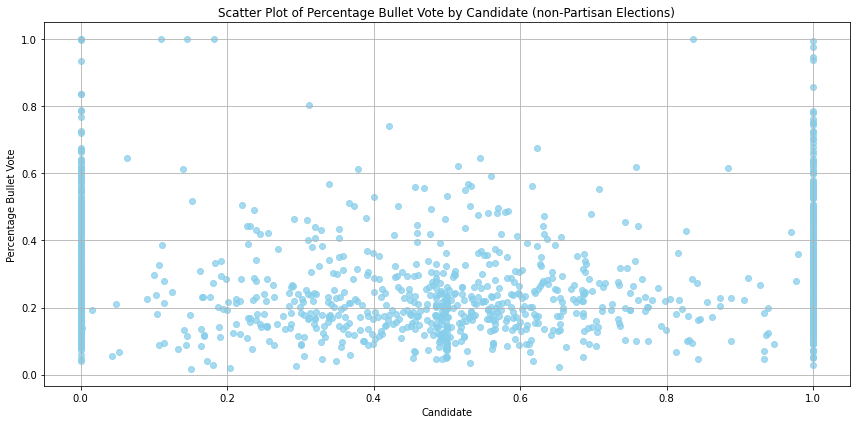

In [45]:
directory = "np_data_new"
df = pd.read_csv("median_voter_analysis.csv")

partisan_kdes = {'YES': [], 'NO': []}
election = pd.read_csv("election_table.csv")
candidate_percentage_pairs = []
all_bullet_votes = {}
all_votes = {}
for file in os.listdir(directory):
    filename = file[0:-4]
    #print(filename) 
    #print(df.loc[df["filename"]==(filename+'.csv'), "partisan"].tolist()[0])
    try:        
        
        if df.loc[df["filename"]==(filename+'.csv'), "partisan"].tolist()[0] == 'NO':
            ballots, candidates = load_data(filename, "saved_ballots_and_candidates")
            directory2 = "null_elections/"
            csv = directory2 + filename + '.csv'
            df2 = pd.read_csv(csv)  
            candidates = df2['candidate'].values
            
            choices = len(candidates)
            positions = pd.Series(df2['position'].values, index=df2['candidate']).to_dict()
            normalized_distances = normalize_positions(positions)
            bullet_votes = {}
            total_votes = {}
            for b in ballots:
                if len(b) > 0:
                    first_place_choice = normalized_distances[b[0]]
                    if first_place_choice not in total_votes:
                        total_votes[first_place_choice] = 0
                    total_votes[first_place_choice] += ballots[b]

                if len(b) == 1:
                    first_place_choice = normalized_distances[b[0]]
                    if first_place_choice not in bullet_votes:
                        bullet_votes[first_place_choice] = 0
                    bullet_votes[first_place_choice] += ballots[b]

            percent_bullet_vote = {}
            for candidate in bullet_votes:
                percent_bullet_vote[candidate] = bullet_votes[candidate] / total_votes[candidate]
                candidate_percentage_pairs.append((candidate, percent_bullet_vote[candidate]))  # Append the pair
            
            all_bullet_votes = merge_dicts_sum(all_bullet_votes, percent_bullet_vote)
            #all_votes = merge_dicts_sum(all_votes, total_votes)

    except Exception as e:
        print (filename, " " , e)


"""percent_bullet_vote = {}
for candidate in all_bullet_votes:
    percent_bullet_vote[candidate] = all_bullet_votes[candidate] / all_votes[candidate]"""

candidate_percentage_pairs = np.array(candidate_percentage_pairs)

# Plot the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(candidate_percentage_pairs[:, 0], candidate_percentage_pairs[:, 1], alpha=0.75, color='skyblue')
plt.xlabel('Candidate')
plt.ylabel('Percentage Bullet Vote')
plt.title('Scatter Plot of Percentage Bullet Vote by Candidate (non-Partisan Elections)')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

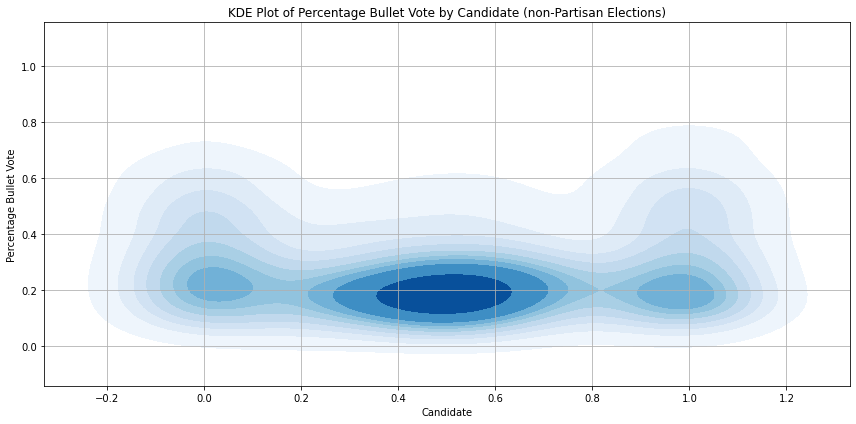

In [47]:
candidate_percentage_df = pd.DataFrame(candidate_percentage_pairs, columns=['Candidate', 'PercentageBulletVote'])

# Plot the KDE
plt.figure(figsize=(12, 6))
sns.kdeplot(data=candidate_percentage_df, x='Candidate', y='PercentageBulletVote', cmap='Blues', fill=True)
plt.xlabel('Candidate')
plt.ylabel('Percentage Bullet Vote')
plt.title('KDE Plot of Percentage Bullet Vote by Candidate (non-Partisan Elections)')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

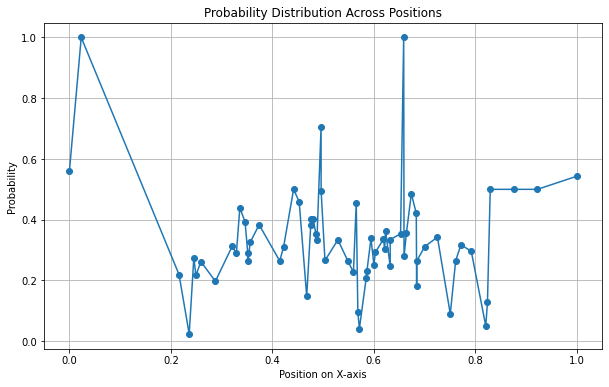

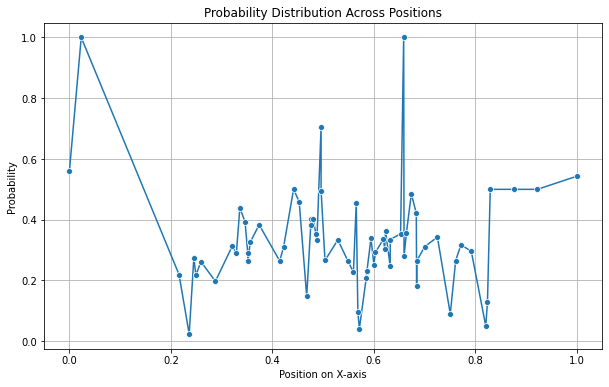

In [50]:
import pandas as pd
import numpy as np

# Convert to DataFrame
df = pd.DataFrame(candidate_percentage_pairs, columns=['Position', 'Percentage'])

# Aggregate data by taking the average percentage for each position
df_aggregated = df.groupby('Position').mean().reset_index()

# Optionally, sort by Position
df_aggregated = df_aggregated.sort_values(by='Position')

import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib Plot
plt.figure(figsize=(10, 6))
plt.plot(df_aggregated['Position'], df_aggregated['Percentage'], marker='o', linestyle='-')
plt.xlabel('Position on X-axis')
plt.ylabel('Probability')
plt.title('Probability Distribution Across Positions')
plt.grid(True)
plt.show()

# Seaborn Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_aggregated, x='Position', y='Percentage', marker='o')
plt.xlabel('Position on X-axis')
plt.ylabel('Probability')
plt.title('Probability Distribution Across Positions')
plt.grid(True)
plt.show()



In [ ]:
candidate_percentage_df = pd.DataFrame(candidate_percentage_pairs, columns=['Candidate', 'PercentageBulletVote'])

# Plot the KDE
plt.figure(figsize=(12, 6))
sns.kdeplot(data=candidate_percentage_df, x='Candidate', y='PercentageBulletVote', cmap='Blues', fill=True)
plt.xlabel('Candidate')
plt.ylabel('Percentage Bullet Vote')
plt.title('KDE Plot of Percentage Bullet Vote by Candidate')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

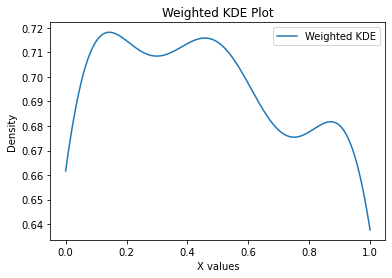

In [35]:
x_values = np.array(list(all_bullet_votes.keys()))
y_weights = np.array(list(all_bullet_votes.values()))

# Calculate the weighted KDE
kde = gaussian_kde(x_values, weights=y_weights, bw_method=0.5)

# Create a range of values for plotting the KDE
x_range = np.linspace(min(x_values), max(x_values), 1000)

# Plot the KDE
plt.plot(x_range, kde(x_range), label='Weighted KDE')
plt.xlabel('X values')
plt.ylabel('Density')
plt.title('Weighted KDE Plot')
plt.legend()
plt.show()